In [ ]:
!pip install scikit-optimize

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 107.8/107.8 kB 9.1 MB/s eta 0:00:00


In [ ]:
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split

from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from skopt import BayesSearchCV
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.linear_model import ElasticNet

from sklearn.metrics import balanced_accuracy_score
import matplotlib.pyplot as plt

# Ustalenie badanych parametrów

In [ ]:
# przykładowe parametry, ich dobór jeszcze do przemyślenia
param_randomforest = {'n_estimators': [50, 100, 150, 200, 250, 300, 350, 400],
              'criterion': ['gini', 'entropy', 'log_loss'],
              'max_depth': [5*x for x in range(1,11)],
              'min_samples_leaf': [x for x in range(1,15)],
              'min_samples_split': [x for x in range(2,15)],
              'max_features': ['sqrt', 'log2', None]}

In [ ]:
# przykładowe parametry, ich dobór jeszcze do przemyślenia
param_xgboost = {'n_estimators': [50, 100, 150, 200, 250, 300, 350, 400],
                 'learning_rate': [0.01, 0.05, 0.1, 0.15, 0.2, 0.25, 0.3],
                 'max_depth': [x for x in range(3,15)],
                 'subsample': [0.1*x for x in range(5,11)]}

In [ ]:
param_extratrees = {'n_estimators': [50, 100, 150, 200, 250, 300, 350, 400],
                    'criterion': ['gini', 'entropy', 'log_loss'],
                    'max_depth': [5*x for x in range(1,11)],
                    'min_samples_split': [x for x in range(2,15)],
                    'min_samples_leaf': [x for x in range(1,15)],
                    'max_features': ['sqrt', 'log2', None]}

In [ ]:
!pip install openml

  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 158.0/158.0 kB 13.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 93.9/93.9 kB 8.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 MB 28.1 MB/s eta 0:00:00
  Created wheel for liac-arff: filename=liac_arff-2.5.0-py3-none-any.whl size=11716 sha256=cc17a720d84dc7946a3a4dab60051cab3baa6bec4898dd13fe8bcf5b9e4ad4aa
  Stored in directory: /root/.cache/pip/wheels/5d/2a/9c/3895d9617f8f49a0883ba686326d598e78a1c2f54fe3cae86d
Successfully built liac-arff


In [ ]:
import openml

# Załadowanie danych

## Dane 1

In [ ]:
heart = pd.read_csv('heart.csv')

X1 = heart.drop('output', axis=1)
y1 = heart['output']

In [ ]:
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.3)

## Dane 2

In [ ]:
dataset = openml.datasets.get_dataset(37)

In [ ]:
data_2, _, _, _ = dataset.get_data(dataset_format="dataframe")

In [ ]:
X2 = data_2.drop('class', axis=1)
y2 = data_2['class']
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.3)

## Dane 3

In [ ]:
dataset = openml.datasets.get_dataset(53)
data_3, _, _, _ = dataset.get_data(dataset_format="dataframe")

In [ ]:
X3 = data_3.drop('class', axis=1)
y3 = data_3['class']
X3_train, X3_test, y3_train, y3_test = train_test_split(X3, y3, test_size=0.3)

## Dane 4

In [ ]:
dataset = openml.datasets.get_dataset(925)
data_4, _, _, _ = dataset.get_data(dataset_format="dataframe")

In [ ]:
X4 = data_4.drop('binaryClass', axis=1)
y4 = data_4['binaryClass']
X4_train, X4_test, y4_train, y4_test = train_test_split(X4, y4, test_size=0.3)

# Random forest

## Random Search

In [ ]:
random_rf = RandomizedSearchCV(
                RandomForestClassifier(), param_randomforest, cv=5, scoring='balanced_accuracy',
                n_jobs=-1, n_iter=100, random_state = 10)

### Dane 1

In [ ]:
random_rf_1 = random_rf.fit(X1_train, y1_train)
best_param_random_rf_1 = random_rf_1.best_params_

In [ ]:
results_random_rf_1 = random_rf_1.cv_results_
mean_test_scores_random_rf_1 = results_random_rf_1['mean_test_score']

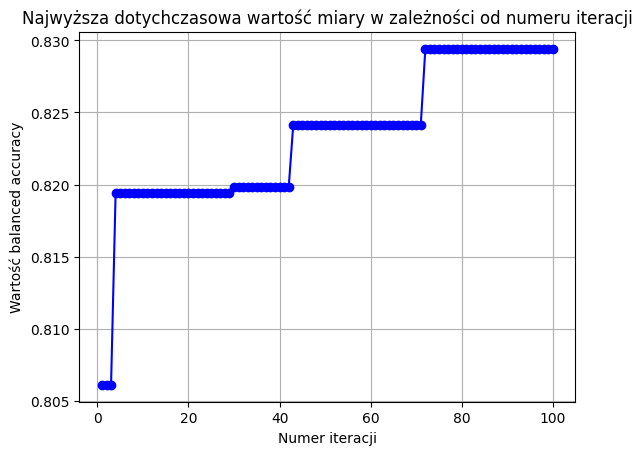

In [ ]:
best_random_rf_1 = np.maximum.accumulate(mean_test_scores_random_rf_1)
plt.plot(range(1, len(best_random_rf_1) + 1), best_random_rf_1, marker='o', color='b')
plt.xlabel('Numer iteracji')
plt.ylabel('Wartość balanced accuracy')
plt.title('Najwyższa dotychczasowa wartość miary w zależności od numeru iteracji')
plt.grid(True)
plt.show()

In [ ]:
# miara balanced_accuracy na zbiorze testowym
predicted_random_rf_1 = random_rf_1.predict(X1_test)
balanced_accuracy_score(y1_test, predicted_random_rf_1)

0.8302439024390245

### Dane 2

In [ ]:
random_rf_2 = random_rf.fit(X2_train, y2_train)
best_param_random_rf_2 = random_rf_2.best_params_

/usr/local/lib/python3.10/dist-packages/numpy/ma/core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


In [ ]:
results_random_rf_2 = random_rf_2.cv_results_
mean_test_scores_random_rf_2 = results_random_rf_2['mean_test_score']

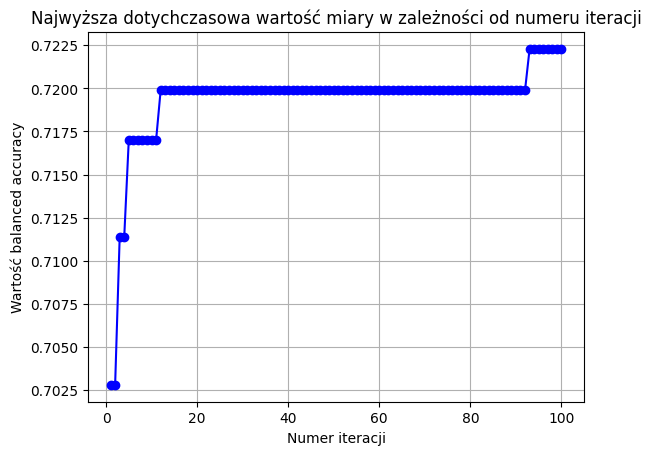

In [ ]:
best_random_rf_2 = np.maximum.accumulate(mean_test_scores_random_rf_2)
plt.plot(range(1, len(best_random_rf_2) + 1), best_random_rf_2, marker='o', color='b')
plt.xlabel('Numer iteracji')
plt.ylabel('Wartość balanced accuracy')
plt.title('Najwyższa dotychczasowa wartość miary w zależności od numeru iteracji')
plt.grid(True)
plt.show()

In [ ]:
# miara balanced_accuracy na zbiorze testowym
predicted_random_rf_2 = random_rf_2.predict(X2_test)
balanced_accuracy_score(y2_test, predicted_random_rf_2)

0.7334023178807947

### Dane 3

In [ ]:
random_rf_3 = random_rf.fit(X3_train, y3_train)
best_param_random_rf_3 = random_rf_3.best_params_

In [ ]:
results_random_rf_3 = random_rf_3.cv_results_
mean_test_scores_random_rf_3 = results_random_rf_3['mean_test_score']

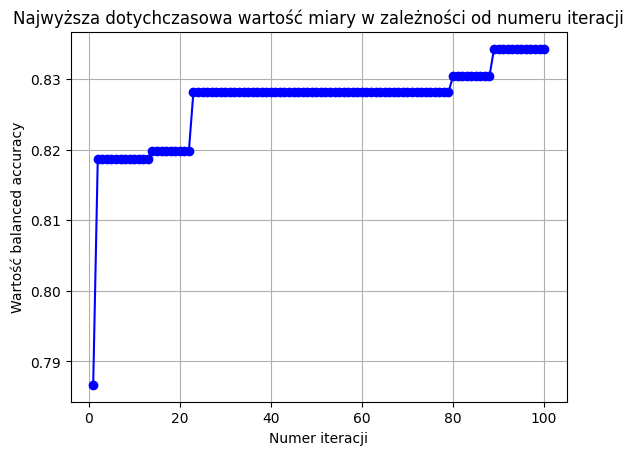

In [ ]:
best_random_rf_3 = np.maximum.accumulate(mean_test_scores_random_rf_3)
plt.plot(range(1, len(best_random_rf_3) + 1), best_random_rf_3, marker='o', color='b')
plt.xlabel('Numer iteracji')
plt.ylabel('Wartość balanced accuracy')
plt.title('Najwyższa dotychczasowa wartość miary w zależności od numeru iteracji')
plt.grid(True)
plt.show()

In [ ]:
# miara balanced_accuracy na zbiorze testowym
predicted_random_rf_3 = random_rf_3.predict(X3_test)
balanced_accuracy_score(y3_test, predicted_random_rf_3)

0.8782608695652174

### Dane 4

In [ ]:
random_rf_4 = random_rf.fit(X4_train, y4_train)
best_param_random_rf_4 = random_rf_4.best_params_

In [ ]:
results_random_rf_4 = random_rf_4.cv_results_
mean_test_scores_random_rf_4 = results_random_rf_4['mean_test_score']

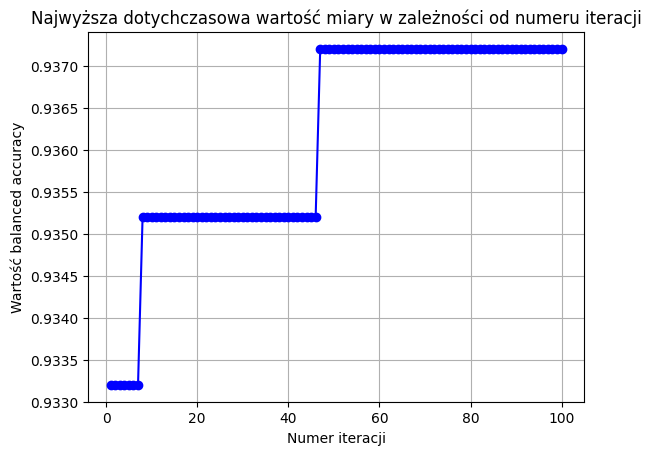

In [ ]:
best_random_rf_4 = np.maximum.accumulate(mean_test_scores_random_rf_4)
plt.plot(range(1, len(best_random_rf_4) + 1), best_random_rf_4, marker='o', color='b')
plt.xlabel('Numer iteracji')
plt.ylabel('Wartość balanced accuracy')
plt.title('Najwyższa dotychczasowa wartość miary w zależności od numeru iteracji')
plt.grid(True)
plt.show()

In [ ]:
# miara balanced_accuracy na zbiorze testowym
predicted_random_rf_4 = random_rf_4.predict(X4_test)
balanced_accuracy_score(y4_test, predicted_random_rf_4)

0.9895833333333333

### Optymalne parametry

In [ ]:
scores_random_rf = np.array([mean_test_scores_random_rf_1, mean_test_scores_random_rf_2,
                             mean_test_scores_random_rf_3, mean_test_scores_random_rf_4])
df_scores_random_rf = pd.DataFrame(scores_random_rf)

In [ ]:
default_param_rf = results_random_rf_1['params'][df_scores_random_rf.mean().argmax()]
default_param_rf

{'n_estimators': 350,
 'min_samples_split': 9,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': 25,
 'criterion': 'entropy'}

In [ ]:
default_score_rf_1 = mean_test_scores_random_rf_1[df_scores_random_rf.mean().argmax()]
default_score_rf_2 = mean_test_scores_random_rf_2[df_scores_random_rf.mean().argmax()]
default_score_rf_3 = mean_test_scores_random_rf_3[df_scores_random_rf.mean().argmax()]
default_score_rf_4 = mean_test_scores_random_rf_4[df_scores_random_rf.mean().argmax()]

### Tunowalność

In [ ]:
d_random_rf_1 = default_score_rf_1 - max(mean_test_scores_random_rf_1)
d_random_rf_1

-0.016475972540045736

In [ ]:
d_random_rf_2 = default_score_rf_2 - max(mean_test_scores_random_rf_2)
d_random_rf_2

-0.010033279438313891

In [ ]:
d_random_rf_3 = default_score_rf_3 - max(mean_test_scores_random_rf_3)
d_random_rf_3

-0.024047619047618873

In [ ]:
d_random_rf_4 = default_score_rf_4 - max(mean_test_scores_random_rf_4)
d_random_rf_4

0.0

## Bayes Optimization

In [ ]:
bayes_rf = BayesSearchCV(
                RandomForestClassifier(), param_randomforest, cv=5, scoring='balanced_accuracy',
                n_jobs=-1, n_iter=50, random_state = 10)

### Dane 1

In [ ]:
bayes_rf_1 = bayes_rf.fit(X1_train, y1_train)
best_param_bayes_rf_1 = bayes_rf_1.best_params_

/usr/local/lib/python3.10/dist-packages/numpy/ma/core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,
/usr/local/lib/python3.10/dist-packages/numpy/ma/core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,
/usr/local/lib/python3.10/dist-packages/numpy/ma/core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,
/usr/local/lib/python3.10/dist-packages/numpy/ma/core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,
/usr/local/lib/python3.10/dist-packages/numpy/ma/core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


In [ ]:
results_bayes_rf_1 = bayes_rf_1.cv_results_
mean_test_scores_bayes_rf_1 = results_bayes_rf_1['mean_test_score']

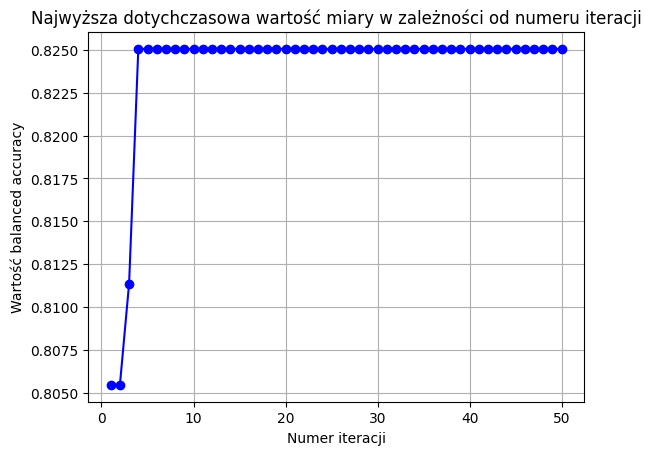

In [ ]:
best_bayes_rf_1 = np.maximum.accumulate(mean_test_scores_bayes_rf_1)
plt.plot(range(1, len(best_bayes_rf_1) + 1), best_bayes_rf_1, marker='o', color='b')
plt.xlabel('Numer iteracji')
plt.ylabel('Wartość balanced accuracy')
plt.title('Najwyższa dotychczasowa wartość miary w zależności od numeru iteracji')
plt.grid(True)
plt.show()

In [ ]:
# miara balanced_accuracy na zbiorze testowym
predicted_bayes_rf_1 = bayes_rf_1.predict(X1_test)
balanced_accuracy_score(y1_test, predicted_bayes_rf_1)

0.822439024390244

### Dane 2

In [ ]:
bayes_rf_2 = bayes_rf.fit(X2_train, y2_train)
best_param_bayes_rf_2 = bayes_rf_2.best_params_

In [ ]:
results_bayes_rf_2 = bayes_rf_2.cv_results_
mean_test_scores_bayes_rf_2 = results_bayes_rf_2['mean_test_score']

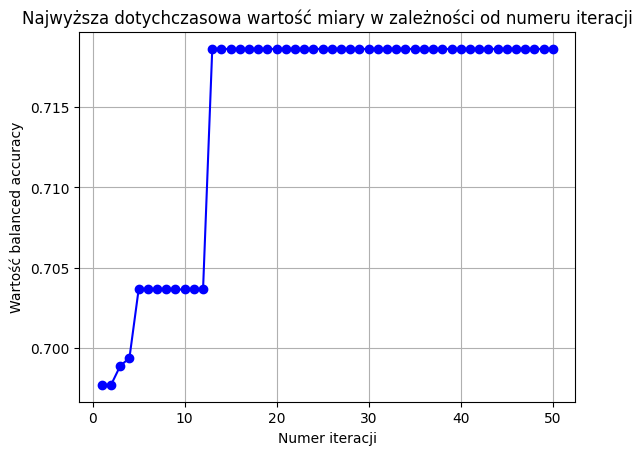

In [ ]:
best_bayes_rf_2 = np.maximum.accumulate(mean_test_scores_bayes_rf_2)
plt.plot(range(1, len(best_bayes_rf_2) + 1), best_bayes_rf_2, marker='o', color='b')
plt.xlabel('Numer iteracji')
plt.ylabel('Wartość balanced accuracy')
plt.title('Najwyższa dotychczasowa wartość miary w zależności od numeru iteracji')
plt.grid(True)
plt.show()

In [ ]:
# miara balanced_accuracy na zbiorze testowym
predicted_bayes_rf_2 = bayes_rf_2.predict(X2_test)
balanced_accuracy_score(y2_test, predicted_bayes_rf_2)

0.7400248344370861

### Dane 3

In [ ]:
bayes_rf_3 = bayes_rf.fit(X3_train, y3_train)
best_param_bayes_rf_3 = bayes_rf_3.best_params_

In [ ]:
results_bayes_rf_3 = bayes_rf_3.cv_results_
mean_test_scores_bayes_rf_3 = results_bayes_rf_3['mean_test_score']

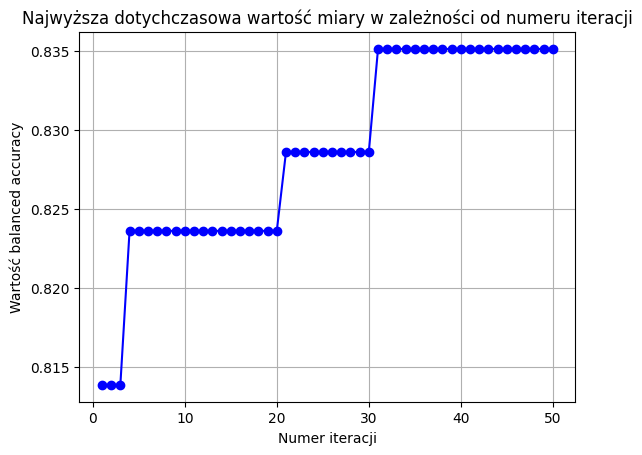

In [ ]:
best_bayes_rf_3 = np.maximum.accumulate(mean_test_scores_bayes_rf_3)
plt.plot(range(1, len(best_bayes_rf_3) + 1), best_bayes_rf_3, marker='o', color='b')
plt.xlabel('Numer iteracji')
plt.ylabel('Wartość balanced accuracy')
plt.title('Najwyższa dotychczasowa wartość miary w zależności od numeru iteracji')
plt.grid(True)
plt.show()

In [ ]:
# miara balanced_accuracy na zbiorze testowym
predicted_bayes_rf_3 = bayes_rf_3.predict(X3_test)
balanced_accuracy_score(y3_test, predicted_bayes_rf_3)

0.8782608695652174

### Dane 4

In [ ]:
bayes_rf_4 = bayes_rf.fit(X4_train, y4_train)
best_param_bayes_rf_4 = bayes_rf_4.best_params_

/usr/local/lib/python3.10/dist-packages/numpy/ma/core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


In [ ]:
results_bayes_rf_4 = bayes_rf_4.cv_results_
mean_test_scores_bayes_rf_4 = results_bayes_rf_4['mean_test_score']

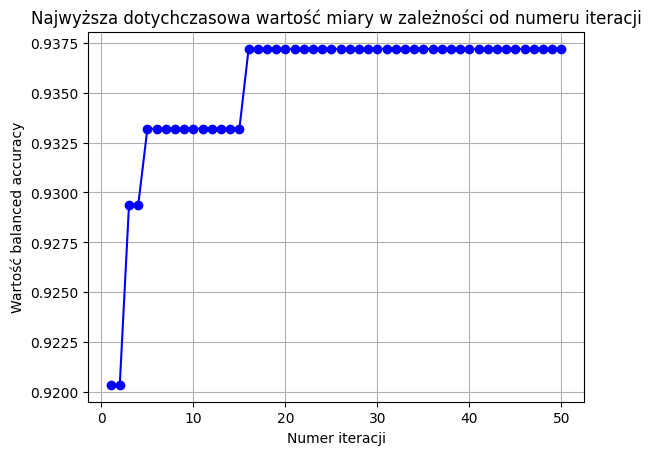

In [ ]:
best_bayes_rf_4 = np.maximum.accumulate(mean_test_scores_bayes_rf_4)
plt.plot(range(1, len(best_bayes_rf_4) + 1), best_bayes_rf_4, marker='o', color='b')
plt.xlabel('Numer iteracji')
plt.ylabel('Wartość balanced accuracy')
plt.title('Najwyższa dotychczasowa wartość miary w zależności od numeru iteracji')
plt.grid(True)
plt.show()

In [ ]:
# miara balanced_accuracy na zbiorze testowym
predicted_bayes_rf_4 = bayes_rf_4.predict(X4_test)
balanced_accuracy_score(y4_test, predicted_bayes_rf_4)

1.0

### Tunowalność

In [ ]:
d_bayes_rf_1 = default_score_rf_1 - max(mean_test_scores_bayes_rf_1)
d_bayes_rf_1

-0.01212814645308935

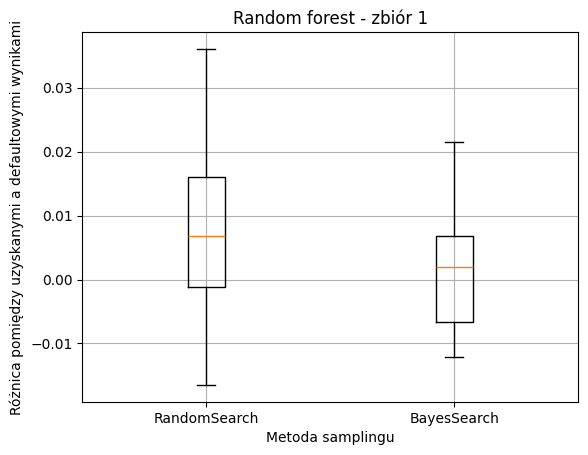

In [ ]:
data = [default_score_rf_1 - mean_test_scores_random_rf_1, default_score_rf_1 - mean_test_scores_bayes_rf_1]
labels = ['RandomSearch', 'BayesSearch']

plt.figure()
plt.boxplot(data, labels=labels)
plt.xlabel("Metoda samplingu")
plt.ylabel("Różnica pomiędzy uzyskanymi a defaultowymi wynikami")
plt.title("Random forest - zbiór 1")
plt.grid(True)
plt.show()

In [ ]:
d_bayes_rf_2 = default_score_rf_2 - max(mean_test_scores_bayes_rf_2)
d_bayes_rf_2

-0.006353133126588695

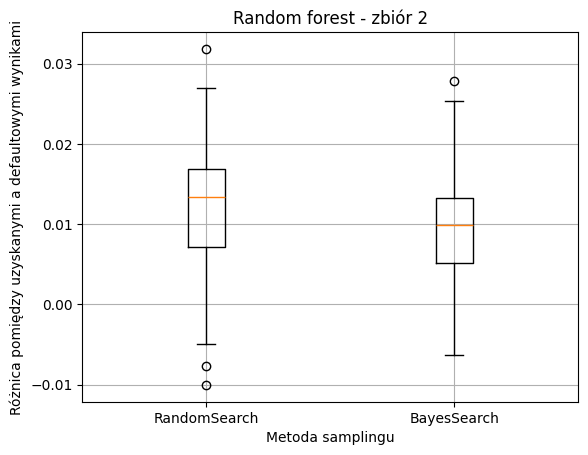

In [ ]:
data = [default_score_rf_2 - mean_test_scores_random_rf_2, default_score_rf_2 - mean_test_scores_bayes_rf_2]
labels = ['RandomSearch', 'BayesSearch']

plt.figure()
plt.boxplot(data, labels=labels)
plt.xlabel("Metoda samplingu")
plt.ylabel("Różnica pomiędzy uzyskanymi a defaultowymi wynikami")
plt.title("Random forest - zbiór 2")
plt.grid(True)
plt.show()

In [ ]:
d_bayes_rf_3 = default_score_rf_3 - max(mean_test_scores_bayes_rf_3)
d_bayes_rf_3

-0.02492997198879543

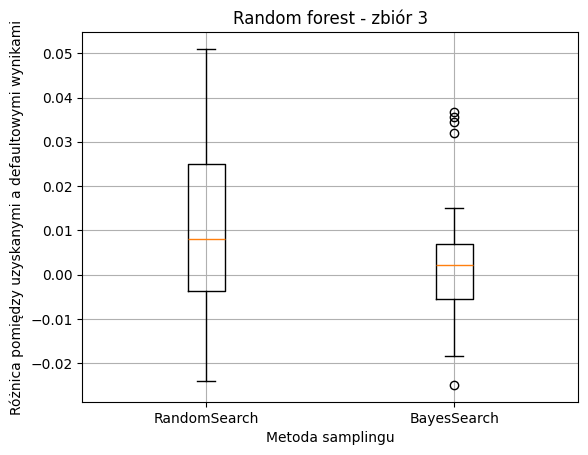

In [ ]:
data = [default_score_rf_3 - mean_test_scores_random_rf_3, default_score_rf_3 - mean_test_scores_bayes_rf_3]
labels = ['RandomSearch', 'BayesSearch']

plt.figure()
plt.boxplot(data, labels=labels)
plt.xlabel("Metoda samplingu")
plt.ylabel("Różnica pomiędzy uzyskanymi a defaultowymi wynikami")
plt.title("Random forest - zbiór 3")
plt.grid(True)
plt.show()

In [ ]:
d_bayes_rf_4 = default_score_rf_4 - max(mean_test_scores_bayes_rf_4)
d_bayes_rf_4

0.0

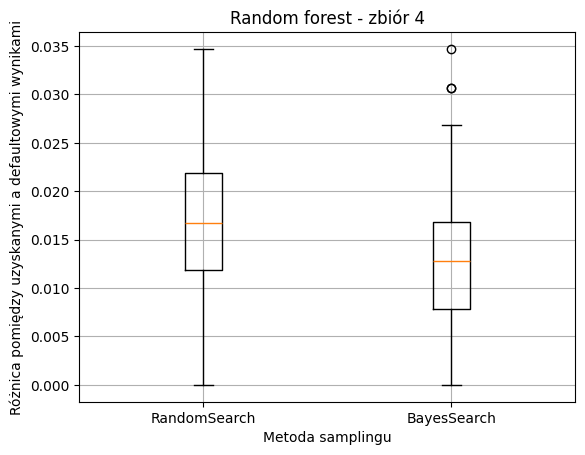

In [ ]:
data = [default_score_rf_4 - mean_test_scores_random_rf_4, default_score_rf_4 - mean_test_scores_bayes_rf_4]
labels = ['RandomSearch', 'BayesSearch']

plt.figure()
plt.boxplot(data, labels=labels)
plt.xlabel("Metoda samplingu")
plt.ylabel("Różnica pomiędzy uzyskanymi a defaultowymi wynikami")
plt.title("Random forest - zbiór 4")
plt.grid(True)
plt.show()

# xgboost

## Random Search

In [ ]:
random_xgb = RandomizedSearchCV(
                XGBClassifier(), param_xgboost, cv=5, scoring='balanced_accuracy',
                n_jobs=-1, n_iter=100, random_state = 10)

### Dane 1

In [ ]:
random_xgb_1 = random_xgb.fit(X1_train, y1_train)
best_param_random_xgb_1 = random_xgb_1.best_params_

In [ ]:
results_random_xgb_1 = random_xgb_1.cv_results_
mean_test_scores_random_xgb_1 = results_random_xgb_1['mean_test_score']

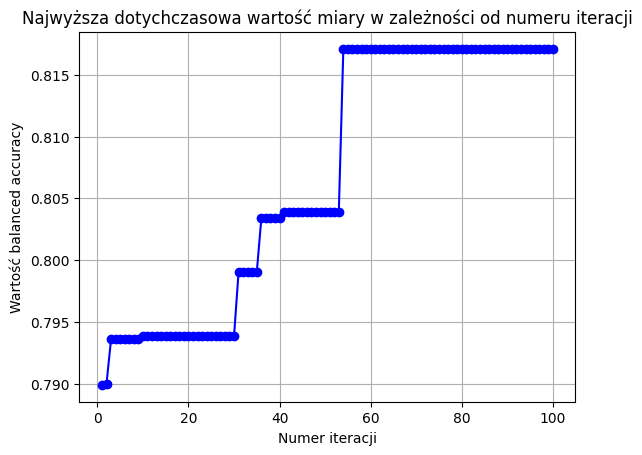

In [ ]:
best_random_xgb_1 = np.maximum.accumulate(mean_test_scores_random_xgb_1)
plt.plot(range(1, len(best_random_xgb_1) + 1), best_random_xgb_1, marker='o', color='b')
plt.xlabel('Numer iteracji')
plt.ylabel('Wartość balanced accuracy')
plt.title('Najwyższa dotychczasowa wartość miary w zależności od numeru iteracji')
plt.grid(True)
plt.show()

In [ ]:
# miara balanced_accuracy na zbiorze testowym
predicted_random_xgb_1 = random_xgb_1.predict(X1_test)
balanced_accuracy_score(y1_test, predicted_random_xgb_1)

0.8411764705882353

### Dane 2

In [ ]:
from sklearn.preprocessing import LabelEncoder

# Encode target labels as integers
label_encoder = LabelEncoder()
y2_train_encoded = label_encoder.fit_transform(y2_train)
y2_test_encoded = label_encoder.transform(y2_test)

# Fit the model using the encoded labels
random_xgb_2 = random_xgb.fit(X2_train, y2_train_encoded)
best_param_random_xgb_2 = random_xgb_2.best_params_

# random_xgb_2 = random_xgb.fit(X2_train, y2_train)
# best_param_random_xgb_2 = random_xgb_2.best_params_

In [ ]:
results_random_xgb_2 = random_xgb_2.cv_results_
mean_test_scores_random_xgb_2 = results_random_xgb_2['mean_test_score']

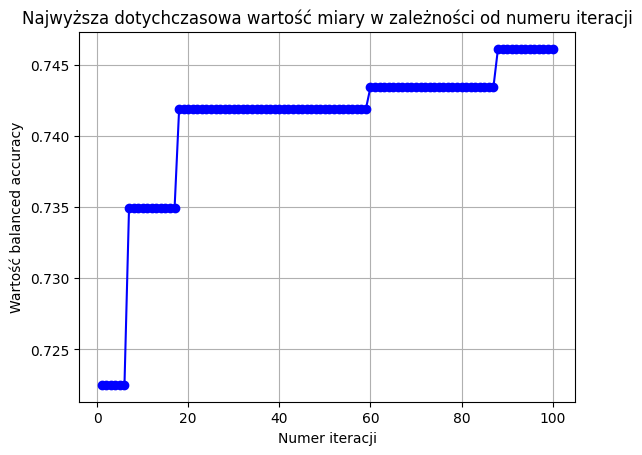

In [ ]:
best_random_xgb_2 = np.maximum.accumulate(mean_test_scores_random_xgb_2)
plt.plot(range(1, len(best_random_xgb_2) + 1), best_random_xgb_2, marker='o', color='b')
plt.xlabel('Numer iteracji')
plt.ylabel('Wartość balanced accuracy')
plt.title('Najwyższa dotychczasowa wartość miary w zależności od numeru iteracji')
plt.grid(True)
plt.show()

In [ ]:
# miara balanced_accuracy na zbiorze testowym
predicted_random_xgb_2 = random_xgb_2.predict(X2_test)
balanced_accuracy_score(y2_test_encoded, predicted_random_xgb_2)

0.7088082057961576

### Dane 3

In [ ]:
label_encoder = LabelEncoder()
y3_train_encoded = label_encoder.fit_transform(y3_train)
y3_test_encoded = label_encoder.transform(y3_test)

random_xgb_3 = random_xgb.fit(X3_train, y3_train_encoded)
best_param_random_xgb_3 = random_xgb_3.best_params_

In [ ]:
results_random_xgb_3 = random_xgb_3.cv_results_
mean_test_scores_random_xgb_3 = results_random_xgb_3['mean_test_score']

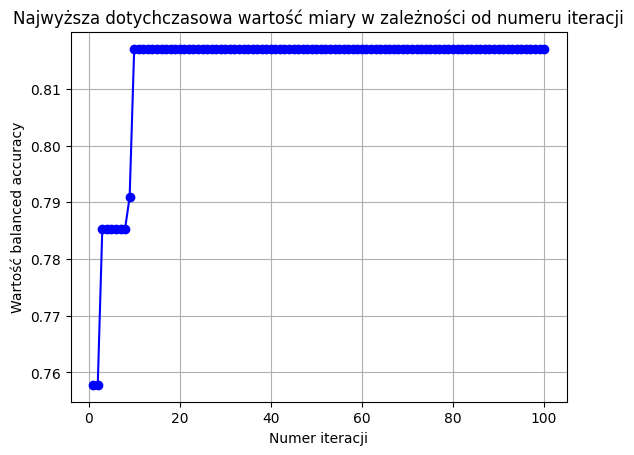

In [ ]:
best_random_xgb_3 = np.maximum.accumulate(mean_test_scores_random_xgb_3)
plt.plot(range(1, len(best_random_xgb_3) + 1), best_random_xgb_3, marker='o', color='b')
plt.xlabel('Numer iteracji')
plt.ylabel('Wartość balanced accuracy')
plt.title('Najwyższa dotychczasowa wartość miary w zależności od numeru iteracji')
plt.grid(True)
plt.show()

In [ ]:
# miara balanced_accuracy na zbiorze testowym
predicted_random_xgb_3 = random_xgb_3.predict(X3_test)
balanced_accuracy_score(y3_test_encoded, predicted_random_xgb_3)

0.8332258064516129

### Dane 4

In [ ]:
y4_train_encoded = label_encoder.fit_transform(y4_train)
y4_test_encoded = label_encoder.transform(y4_test)

random_xgb_4 = random_xgb.fit(X4_train, y4_train_encoded)
best_param_random_xgb_4 = random_xgb_4.best_params_

In [ ]:
results_random_xgb_4 = random_xgb_4.cv_results_
mean_test_scores_random_xgb_4 = results_random_xgb_4['mean_test_score']

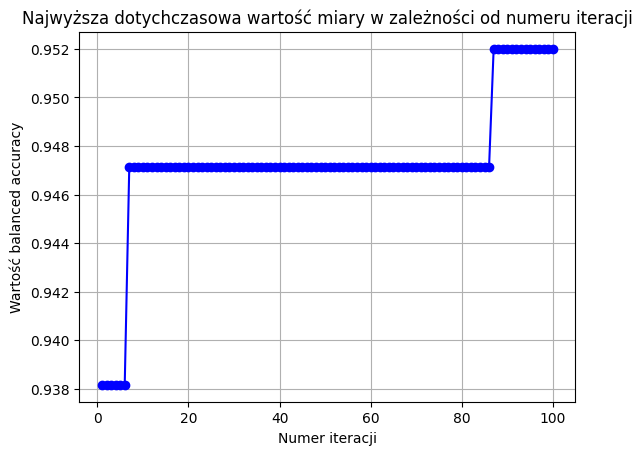

In [ ]:
best_random_xgb_4 = np.maximum.accumulate(mean_test_scores_random_xgb_4)
plt.plot(range(1, len(best_random_xgb_4) + 1), best_random_xgb_4, marker='o', color='b')
plt.xlabel('Numer iteracji')
plt.ylabel('Wartość balanced accuracy')
plt.title('Najwyższa dotychczasowa wartość miary w zależności od numeru iteracji')
plt.grid(True)
plt.show()

In [ ]:
# miara balanced_accuracy na zbiorze testowym
predicted_random_xgb_4 = random_xgb_4.predict(X4_test)
balanced_accuracy_score(y4_test_encoded, predicted_random_xgb_4)

0.96875

### Optymalne parametry

In [ ]:
scores_random_xgb = np.array([mean_test_scores_random_xgb_1, mean_test_scores_random_xgb_2,
                              mean_test_scores_random_xgb_3, mean_test_scores_random_xgb_4])
df_scores_random_xgb = pd.DataFrame(scores_random_xgb)

In [ ]:
default_param_xgb = results_random_xgb_1['params'][df_scores_random_xgb.mean().argmax()]
default_param_xgb

{'subsample': 0.5, 'n_estimators': 200, 'max_depth': 5, 'learning_rate': 0.01}

In [ ]:
default_score_xgb_1 = mean_test_scores_random_xgb_1[df_scores_random_xgb.mean().argmax()]
default_score_xgb_2 = mean_test_scores_random_xgb_2[df_scores_random_xgb.mean().argmax()]
default_score_xgb_3 = mean_test_scores_random_xgb_3[df_scores_random_xgb.mean().argmax()]
default_score_xgb_4 = mean_test_scores_random_xgb_4[df_scores_random_xgb.mean().argmax()]

### Tunowalność

In [ ]:
d_random_xgb_1 = default_score_xgb_1 - max(mean_test_scores_random_xgb_1)
d_random_xgb_1

0.0

In [ ]:
d_random_xgb_2 = default_score_xgb_2 - max(mean_test_scores_random_xgb_2)
d_random_xgb_2

-0.012687476208602999

In [ ]:
d_random_xgb_3 = default_score_xgb_3 - max(mean_test_scores_random_xgb_3)
d_random_xgb_3

-0.005228758169934622

In [ ]:
d_random_xgb_4 = default_score_xgb_4 - max(mean_test_scores_random_xgb_4)
d_random_xgb_4

-0.013846153846153841

## Bayes Optimization

In [ ]:
bayes_xgb = BayesSearchCV(
                XGBClassifier(), param_xgboost, cv=5, scoring='balanced_accuracy',
                n_jobs=-1, n_iter=50, random_state = 10)

### Dane 1

In [ ]:
bayes_xgb_1 = bayes_xgb.fit(X1_train, y1_train)
best_param = bayes_xgb_1.best_params_

In [ ]:

results_bayes_xgb_1 = bayes_xgb_1.cv_results_
mean_test_scores_bayes_xgb_1 = results_bayes_xgb_1['mean_test_score']

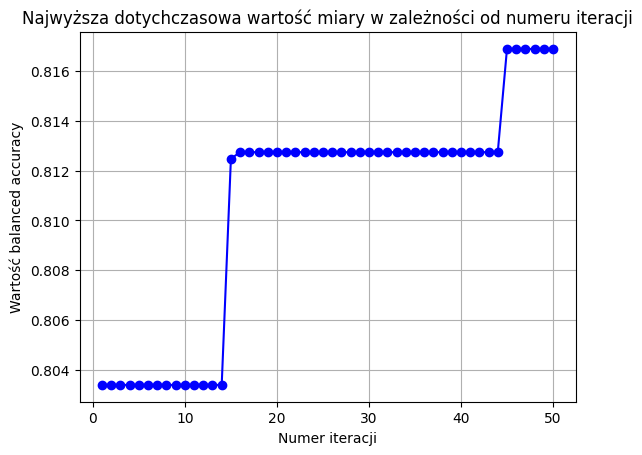

In [ ]:
best_bayes_xgb_1 = np.maximum.accumulate(mean_test_scores_bayes_xgb_1)
plt.plot(range(1, len(best_bayes_xgb_1) + 1), best_bayes_xgb_1, marker='o', color='b')
plt.xlabel('Numer iteracji')
plt.ylabel('Wartość balanced accuracy')
plt.title('Najwyższa dotychczasowa wartość miary w zależności od numeru iteracji')
plt.grid(True)
plt.show()

In [ ]:
# miara balanced_accuracy na zbiorze testowym
predicted_bayes_xgb_1 = bayes_xgb_1.predict(X1_test)
balanced_accuracy_score(y1_test, predicted_bayes_xgb_1)

0.8063725490196079

### Dane 2

In [ ]:
y2_train_encoded = label_encoder.fit_transform(y2_train)
y2_test_encoded = label_encoder.transform(y2_test)


bayes_xgb_2 = bayes_xgb.fit(X2_train, y2_train_encoded)
best_param = bayes_xgb_2.best_params_

In [ ]:
results_bayes_xgb_2 = bayes_xgb_2.cv_results_
mean_test_scores_bayes_xgb_2 = results_bayes_xgb_2['mean_test_score']

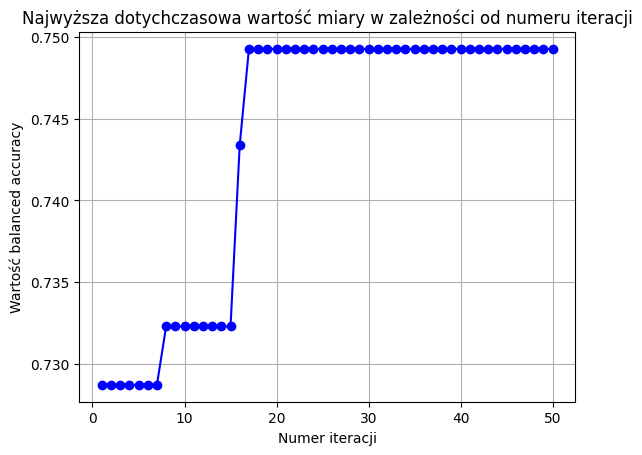

In [ ]:
best_bayes_xgb_2 = np.maximum.accumulate(mean_test_scores_bayes_xgb_2)
plt.plot(range(1, len(best_bayes_xgb_2) + 1), best_bayes_xgb_2, marker='o', color='b')
plt.xlabel('Numer iteracji')
plt.ylabel('Wartość balanced accuracy')
plt.title('Najwyższa dotychczasowa wartość miary w zależności od numeru iteracji')
plt.grid(True)
plt.show()

In [ ]:
# miara balanced_accuracy na zbiorze testowym
predicted_bayes_xgb_2 = bayes_xgb_2.predict(X2_test)
balanced_accuracy_score(y2_test_encoded, predicted_bayes_xgb_2)

0.7114539238033214

### Dane 3

In [ ]:
y3_train_encoded = label_encoder.fit_transform(y3_train)
y3_test_encoded = label_encoder.transform(y3_test)

bayes_xgb_3 = bayes_xgb.fit(X3_train, y3_train_encoded)
best_param = bayes_xgb_3.best_params_

In [ ]:
results_bayes_xgb_3 = bayes_xgb_3.cv_results_
mean_test_scores_bayes_xgb_3 = results_bayes_xgb_3['mean_test_score']

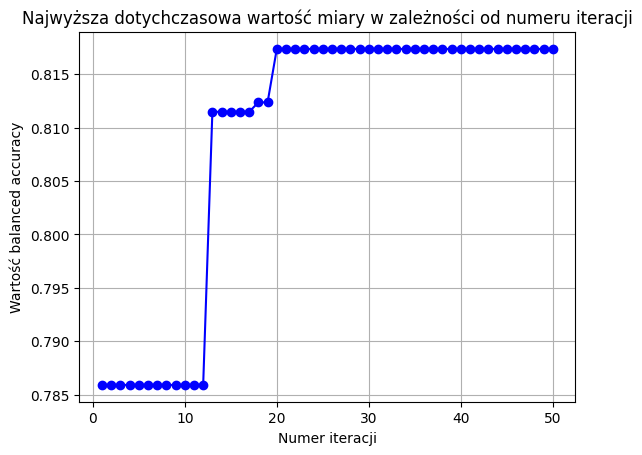

In [ ]:
best_bayes_xgb_3 = np.maximum.accumulate(mean_test_scores_bayes_xgb_3)
plt.plot(range(1, len(best_bayes_xgb_3) + 1), best_bayes_xgb_3, marker='o', color='b')
plt.xlabel('Numer iteracji')
plt.ylabel('Wartość balanced accuracy')
plt.title('Najwyższa dotychczasowa wartość miary w zależności od numeru iteracji')
plt.grid(True)
plt.show()

In [ ]:
# miara balanced_accuracy na zbiorze testowym
predicted_bayes_xgb_3 = bayes_xgb_3.predict(X3_test)
balanced_accuracy_score(y3_test_encoded, predicted_bayes_xgb_3)

0.885483870967742

### Dane 4

In [ ]:
y4_train_encoded = label_encoder.fit_transform(y4_train)
y4_test_encoded = label_encoder.transform(y4_test)

bayes_xgb_4 = bayes_xgb.fit(X4_train, y4_train_encoded)
best_param = bayes_xgb_4.best_params_

/usr/local/lib/python3.10/dist-packages/sklearn/gaussian_process/kernels.py:452: ConvergenceWarning: The optimal value found for dimension 0 of parameter k1__k2__length_scale is close to the specified upper bound 100000.0. Increasing the bound and calling fit again may find a better value.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/gaussian_process/kernels.py:442: ConvergenceWarning: The optimal value found for dimension 3 of parameter k1__k2__length_scale is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/gaussian_process/kernels.py:442: ConvergenceWarning: The optimal value found for dimension 5 of parameter k1__k2__length_scale is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/gaussian_process/kernels.py:442: C

In [ ]:
results_bayes_xgb_4 = bayes_xgb_4.cv_results_
mean_test_scores_bayes_xgb_4 = results_bayes_xgb_4['mean_test_score']

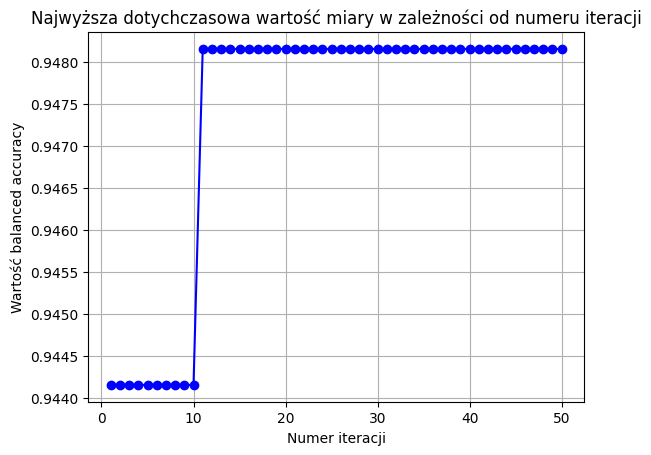

In [ ]:
best_bayes_xgb_4 = np.maximum.accumulate(mean_test_scores_bayes_xgb_4)
plt.plot(range(1, len(best_bayes_xgb_4) + 1), best_bayes_xgb_4, marker='o', color='b')
plt.xlabel('Numer iteracji')
plt.ylabel('Wartość balanced accuracy')
plt.title('Najwyższa dotychczasowa wartość miary w zależności od numeru iteracji')
plt.grid(True)
plt.show()

In [ ]:
# miara balanced_accuracy na zbiorze testowym
predicted_bayes_xgb_4 = bayes_xgb_4.predict(X4_test)
balanced_accuracy_score(y4_test_encoded, predicted_bayes_xgb_4)

0.9585459183673469

### Tunowalność

In [ ]:
d_bayes_xgb_1 = default_score_xgb_1 - max(mean_test_scores_bayes_xgb_1)
d_bayes_xgb_1

0.00019762845849802257

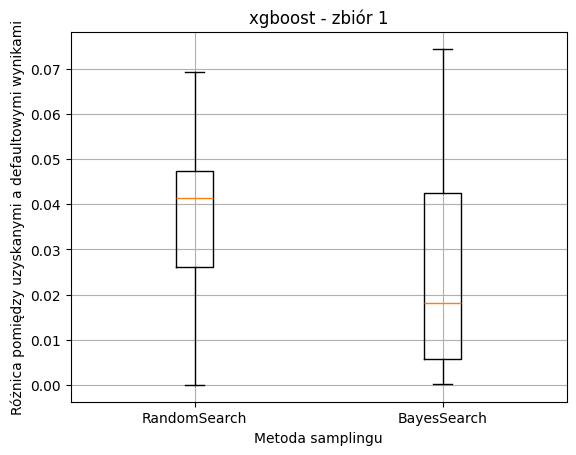

In [ ]:
data = [default_score_xgb_1 - mean_test_scores_random_xgb_1, default_score_xgb_1 - mean_test_scores_bayes_xgb_1]
labels = ['RandomSearch', 'BayesSearch']

plt.figure()
plt.boxplot(data, labels=labels)
plt.xlabel("Metoda samplingu")
plt.ylabel("Różnica pomiędzy uzyskanymi a defaultowymi wynikami")
plt.title("xgboost - zbiór 1")
plt.grid(True)
plt.show()

In [ ]:
d_bayes_xgb_2 = default_score_xgb_2 - max(mean_test_scores_bayes_xgb_2)
d_bayes_xgb_2

-0.015833378650280117

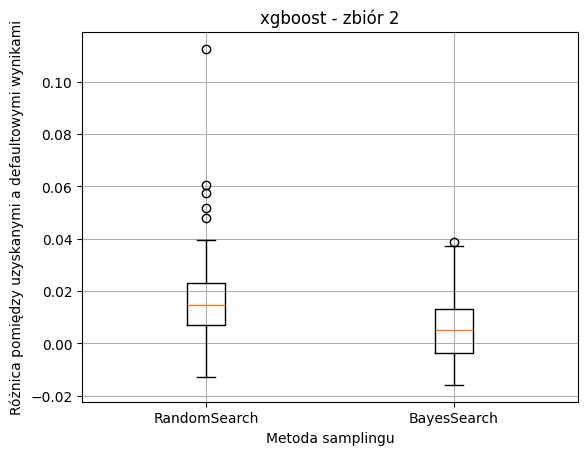

In [ ]:
data = [default_score_xgb_2 - mean_test_scores_random_xgb_2, default_score_xgb_2 - mean_test_scores_bayes_xgb_2]
labels = ['RandomSearch', 'BayesSearch']

plt.figure()
plt.boxplot(data, labels=labels)
plt.xlabel("Metoda samplingu")
plt.ylabel("Różnica pomiędzy uzyskanymi a defaultowymi wynikami")
plt.title("xgboost - zbiór 2")
plt.grid(True)
plt.show()

In [ ]:
d_bayes_xgb_3 = default_score_xgb_3 - max(mean_test_scores_bayes_xgb_3)
d_bayes_xgb_3

-0.005555555555555536

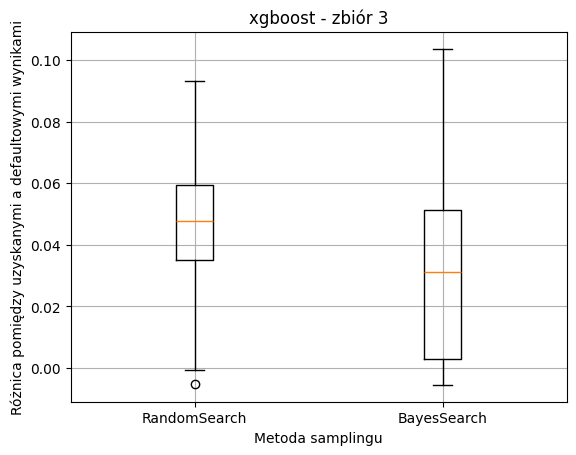

In [ ]:
data = [default_score_xgb_3 - mean_test_scores_random_xgb_3, default_score_xgb_3 - mean_test_scores_bayes_xgb_3]
labels = ['RandomSearch', 'BayesSearch']

plt.figure()
plt.boxplot(data, labels=labels)
plt.xlabel("Metoda samplingu")
plt.ylabel("Różnica pomiędzy uzyskanymi a defaultowymi wynikami")
plt.title("xgboost - zbiór 3")
plt.grid(True)
plt.show()

In [ ]:
d_bayes_xgb_4 = default_score_xgb_4 - max(mean_test_scores_bayes_xgb_4)
d_bayes_xgb_4

-0.010000000000000231

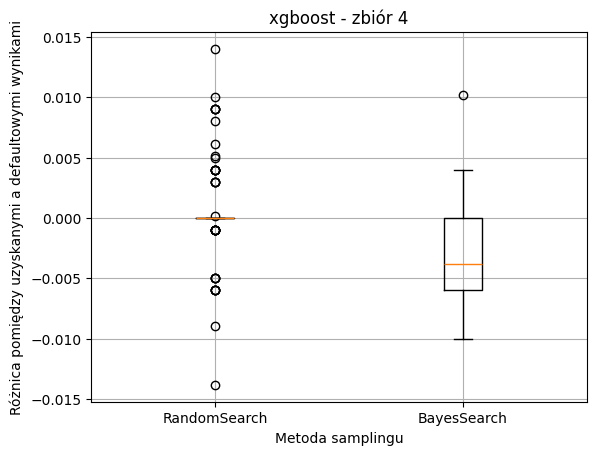

In [ ]:
data = [default_score_xgb_4 - mean_test_scores_random_xgb_4, default_score_xgb_4 - mean_test_scores_bayes_xgb_4]
labels = ['RandomSearch', 'BayesSearch']

plt.figure()
plt.boxplot(data, labels=labels)
plt.xlabel("Metoda samplingu")
plt.ylabel("Różnica pomiędzy uzyskanymi a defaultowymi wynikami")
plt.title("xgboost - zbiór 4")
plt.grid(True)
plt.show()

# Extra trees

## Random Search

In [ ]:
random_extra = RandomizedSearchCV(
                ExtraTreesClassifier(), param_extratrees, cv=5, scoring='balanced_accuracy',
                n_jobs=-1, n_iter=100, random_state = 10)

### Dane 1

In [ ]:
random_extra_1 = random_extra.fit(X1_train, y1_train)
best_param_random_extra_1 = random_extra_1.best_params_

In [ ]:
results_random_extra_1 = random_extra_1.cv_results_
mean_test_scores_random_extra_1 = results_random_extra_1['mean_test_score']

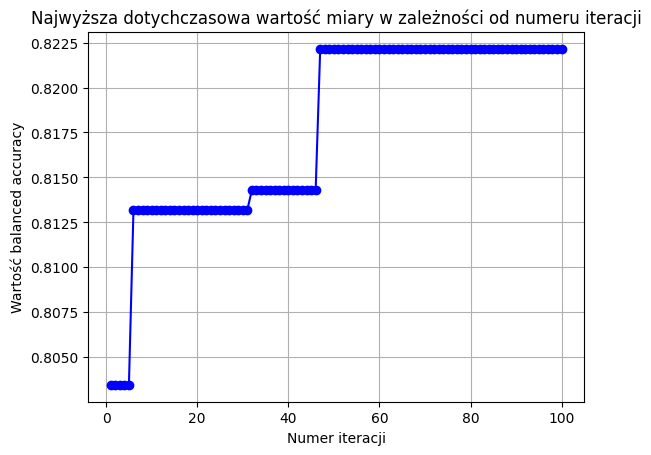

In [ ]:
best_random_extra_1 = np.maximum.accumulate(mean_test_scores_random_extra_1)
plt.plot(range(1, len(best_random_extra_1) + 1), best_random_extra_1, marker='o', color='b')
plt.xlabel('Numer iteracji')
plt.ylabel('Wartość balanced accuracy')
plt.title('Najwyższa dotychczasowa wartość miary w zależności od numeru iteracji')
plt.grid(True)
plt.show()

In [ ]:
# miara balanced_accuracy na zbiorze testowym
predicted_random_extra_1 = random_extra_1.predict(X1_test)
balanced_accuracy_score(y1_test, predicted_random_extra_1)

0.8509803921568628

### Dane 2

In [ ]:
random_extra_2 = random_extra.fit(X2_train, y2_train)
best_param_random_extra_2 = random_extra_2.best_params_

In [ ]:
results_random_extra_2 = random_extra_2.cv_results_
mean_test_scores_random_extra_2 = results_random_extra_2['mean_test_score']

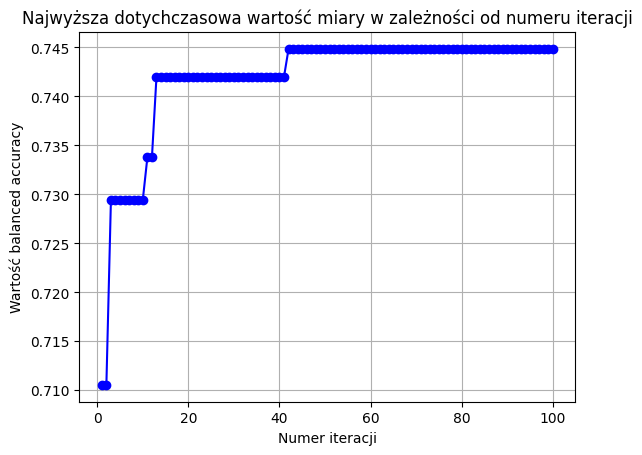

In [ ]:
best_random_extra_2 = np.maximum.accumulate(mean_test_scores_random_extra_2)
plt.plot(range(1, len(best_random_extra_2) + 1), best_random_extra_2, marker='o', color='b')
plt.xlabel('Numer iteracji')
plt.ylabel('Wartość balanced accuracy')
plt.title('Najwyższa dotychczasowa wartość miary w zależności od numeru iteracji')
plt.grid(True)
plt.show()

In [ ]:
# miara balanced_accuracy na zbiorze testowym
predicted_random_extra_2 = random_extra_2.predict(X2_test)
balanced_accuracy_score(y2_test, predicted_random_extra_2)

0.6673721914685771

### Dane 3

In [ ]:
random_extra_3 = random_extra.fit(X3_train, y3_train)
best_param_random_extra_3 = random_extra_3.best_params_

In [ ]:
results_random_extra_3 = random_extra_3.cv_results_
mean_test_scores_random_extra_3 = results_random_extra_3['mean_test_score']

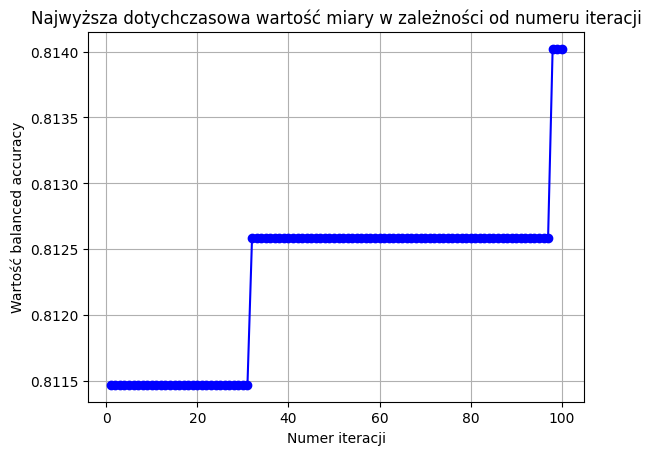

In [ ]:
best_random_extra_3 = np.maximum.accumulate(mean_test_scores_random_extra_3)
plt.plot(range(1, len(best_random_extra_3) + 1), best_random_extra_3, marker='o', color='b')
plt.xlabel('Numer iteracji')
plt.ylabel('Wartość balanced accuracy')
plt.title('Najwyższa dotychczasowa wartość miary w zależności od numeru iteracji')
plt.grid(True)
plt.show()

In [ ]:
# miara balanced_accuracy na zbiorze testowym
predicted_random_extra_3 = random_extra_3.predict(X3_test)
balanced_accuracy_score(y3_test, predicted_random_extra_3)

0.885483870967742

### Dane 4

In [ ]:
random_extra_4 = random_extra.fit(X4_train, y4_train)
best_param_random_extra_4 = random_extra_4.best_params_

In [ ]:
results_random_extra_4 = random_extra_4.cv_results_
mean_test_scores_random_extra_4 = results_random_extra_4['mean_test_score']

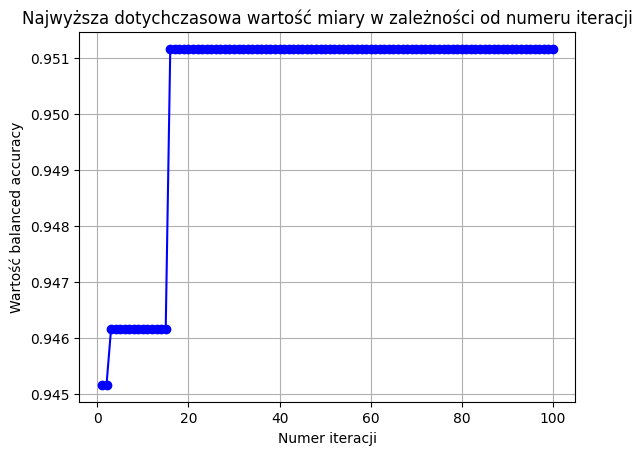

In [ ]:
best_random_extra_4 = np.maximum.accumulate(mean_test_scores_random_extra_4)
plt.plot(range(1, len(best_random_extra_4) + 1), best_random_extra_4, marker='o', color='b')
plt.xlabel('Numer iteracji')
plt.ylabel('Wartość balanced accuracy')
plt.title('Najwyższa dotychczasowa wartość miary w zależności od numeru iteracji')
plt.grid(True)
plt.show()

In [ ]:
# miara balanced_accuracy na zbiorze testowym
predicted_random_extra_4 = random_extra_4.predict(X4_test)
balanced_accuracy_score(y4_test, predicted_random_extra_4)

0.9793792517006803

### Optymalne parametry

In [ ]:
scores_random_extra = np.array([mean_test_scores_random_extra_1, mean_test_scores_random_extra_2,
                                mean_test_scores_random_extra_3, mean_test_scores_random_extra_4])
df_scores_random_extra = pd.DataFrame(scores_random_extra)

In [ ]:
default_param_extra = results_random_extra_1['params'][df_scores_random_extra.mean().argmax()]
default_param_extra

{'n_estimators': 50,
 'min_samples_split': 9,
 'min_samples_leaf': 1,
 'max_features': 'log2',
 'max_depth': 25,
 'criterion': 'entropy'}

In [ ]:
default_score_extra_1 = mean_test_scores_random_extra_1[df_scores_random_extra.mean().argmax()]
default_score_extra_2 = mean_test_scores_random_extra_2[df_scores_random_extra.mean().argmax()]
default_score_extra_3 = mean_test_scores_random_extra_3[df_scores_random_extra.mean().argmax()]
default_score_extra_4 = mean_test_scores_random_extra_4[df_scores_random_extra.mean().argmax()]

### Tunowalność

In [ ]:
d_random_extra_1 = default_score_extra_1 - max(mean_test_scores_random_extra_1)
d_random_extra_1

-0.007845849802371574

In [ ]:
d_random_extra_2 = default_score_extra_2 - max(mean_test_scores_random_extra_2)
d_random_extra_2

-0.021153406928054785

In [ ]:
d_random_extra_3 = default_score_extra_3 - max(mean_test_scores_random_extra_3)
d_random_extra_3

-0.0014379084967320876

In [ ]:
d_random_extra_4 = default_score_extra_4 - max(mean_test_scores_random_extra_4)
d_random_extra_4

-0.014999999999999791

## Bayes Optimization

In [ ]:
bayes_extra = BayesSearchCV(
                ExtraTreesClassifier(), param_extratrees, cv=5, scoring='balanced_accuracy',
                n_jobs=-1, n_iter=50, random_state = 10)

### Dane 1

In [ ]:
bayes_extra_1 = bayes_extra.fit(X1_train, y1_train)
best_param_bayes_extra_1 = bayes_extra_1.best_params_

In [ ]:
results_bayes_extra_1 = bayes_extra_1.cv_results_
mean_test_scores_bayes_extra_1 = results_bayes_extra_1['mean_test_score']

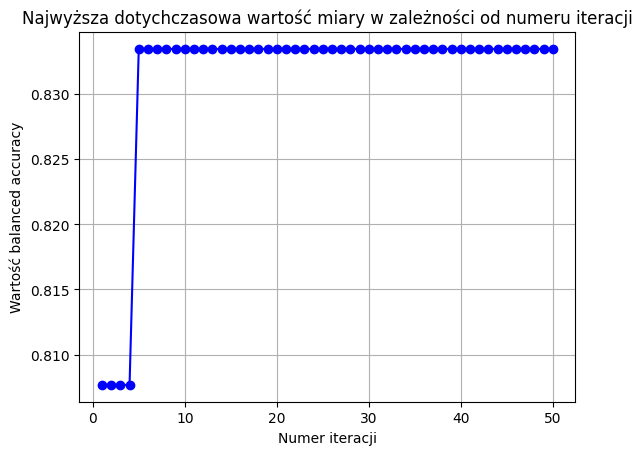

In [ ]:
best_bayes_extra_1 = np.maximum.accumulate(mean_test_scores_bayes_extra_1)
plt.plot(range(1, len(best_bayes_extra_1) + 1), best_bayes_extra_1, marker='o', color='b')
plt.xlabel('Numer iteracji')
plt.ylabel('Wartość balanced accuracy')
plt.title('Najwyższa dotychczasowa wartość miary w zależności od numeru iteracji')
plt.grid(True)
plt.show()

In [ ]:
# miara balanced_accuracy na zbiorze testowym
predicted_bayes_extra_1 = bayes_extra_1.predict(X1_test)
balanced_accuracy_score(y1_test, predicted_bayes_extra_1)

0.8188725490196078

### Dane 2

In [ ]:
bayes_extra_2 = bayes_extra.fit(X2_train, y2_train)
best_param_bayes_extra_2 = bayes_extra_2.best_params_

In [ ]:
results_bayes_extra_2 = bayes_extra_2.cv_results_
mean_test_scores_bayes_extra_2 = results_bayes_extra_2['mean_test_score']

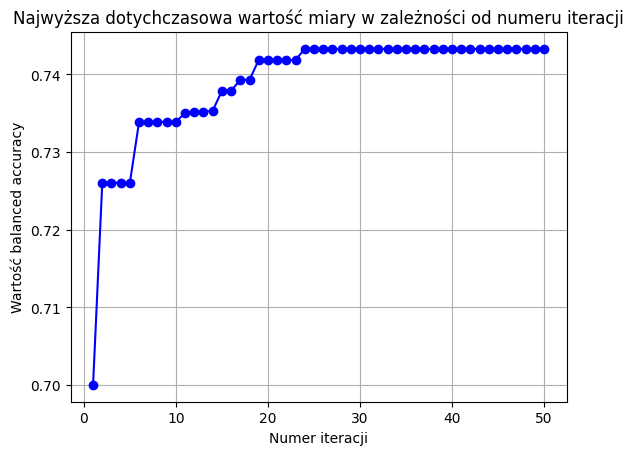

In [ ]:
best_bayes_extra_2 = np.maximum.accumulate(mean_test_scores_bayes_extra_2)
plt.plot(range(1, len(best_bayes_extra_2) + 1), best_bayes_extra_2, marker='o', color='b')
plt.xlabel('Numer iteracji')
plt.ylabel('Wartość balanced accuracy')
plt.title('Najwyższa dotychczasowa wartość miary w zależności od numeru iteracji')
plt.grid(True)
plt.show()

In [ ]:
# miara balanced_accuracy na zbiorze testowym
predicted_bayes_extra_2 = bayes_extra_2.predict(X2_test)
balanced_accuracy_score(y2_test, predicted_bayes_extra_2)

0.6639938130901987

### Dane 3

In [ ]:
bayes_extra_3 = bayes_extra.fit(X3_train, y3_train)
best_param_bayes_extra_3 = bayes_extra_3.best_params_

In [ ]:
results_bayes_extra_3 = bayes_extra_3.cv_results_
mean_test_scores_bayes_extra_3 = results_bayes_extra_3['mean_test_score']

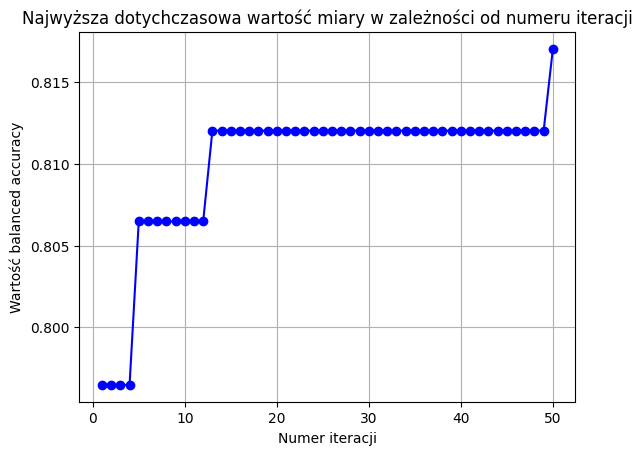

In [ ]:
best_bayes_extra_3 = np.maximum.accumulate(mean_test_scores_bayes_extra_3)
plt.plot(range(1, len(best_bayes_extra_3) + 1), best_bayes_extra_3, marker='o', color='b')
plt.xlabel('Numer iteracji')
plt.ylabel('Wartość balanced accuracy')
plt.title('Najwyższa dotychczasowa wartość miary w zależności od numeru iteracji')
plt.grid(True)
plt.show()

In [ ]:
# miara balanced_accuracy na zbiorze testowym
predicted_bayes_extra_3 = bayes_extra_3.predict(X3_test)
balanced_accuracy_score(y3_test, predicted_bayes_extra_3)

0.8493548387096774

### Dane 4

In [ ]:
bayes_extra_4 = bayes_extra.fit(X4_train, y4_train)
best_param_bayes_extra_4 = bayes_extra_4.best_params_

In [ ]:
results_bayes_extra_4 = bayes_extra_4.cv_results_
mean_test_scores_bayes_extra_4 = results_bayes_extra_4['mean_test_score']

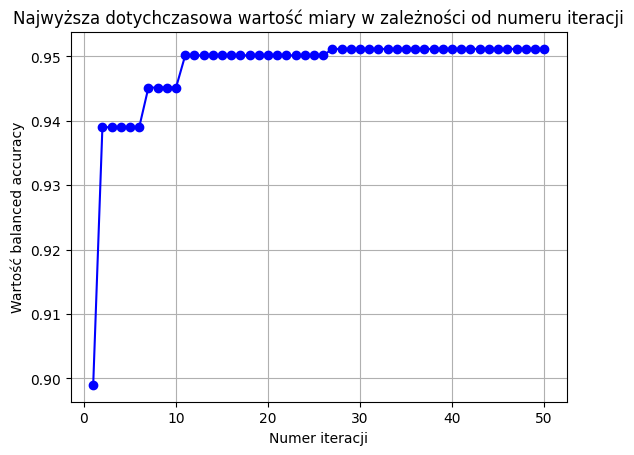

In [ ]:
best_bayes_extra_4 = np.maximum.accumulate(mean_test_scores_bayes_extra_4)
plt.plot(range(1, len(best_bayes_extra_4) + 1), best_bayes_extra_4, marker='o', color='b')
plt.xlabel('Numer iteracji')
plt.ylabel('Wartość balanced accuracy')
plt.title('Najwyższa dotychczasowa wartość miary w zależności od numeru iteracji')
plt.grid(True)
plt.show()

In [ ]:
# miara balanced_accuracy na zbiorze testowym
predicted_bayes_extra_4 = bayes_extra_4.predict(X4_test)
balanced_accuracy_score(y4_test, predicted_bayes_extra_4)

0.9793792517006803

### Tunowalność

In [ ]:
d_bayes_extra_1 = default_score_extra_1 - max(mean_test_scores_bayes_extra_1)
d_bayes_extra_1

-0.019156438527147768

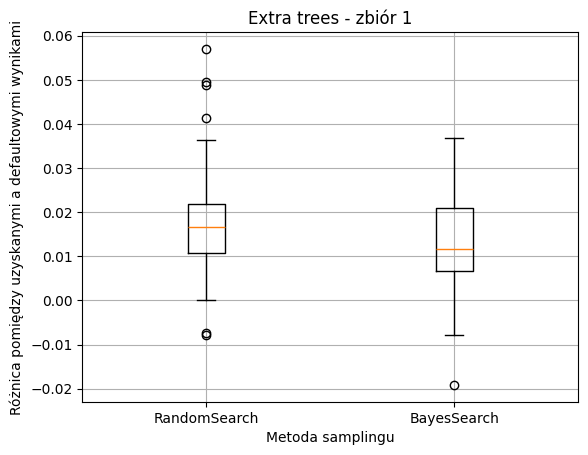

In [ ]:
data = [default_score_extra_1 - mean_test_scores_random_extra_1, default_score_extra_1 - mean_test_scores_bayes_extra_1]
labels = ['RandomSearch', 'BayesSearch']

plt.figure()
plt.boxplot(data, labels=labels)
plt.xlabel("Metoda samplingu")
plt.ylabel("Różnica pomiędzy uzyskanymi a defaultowymi wynikami")
plt.title("Extra trees - zbiór 1")
plt.grid(True)
plt.show()

In [ ]:
d_bayes_extra_2 = default_score_extra_2 - max(mean_test_scores_bayes_extra_2)
d_bayes_extra_2

-0.01959051606938933

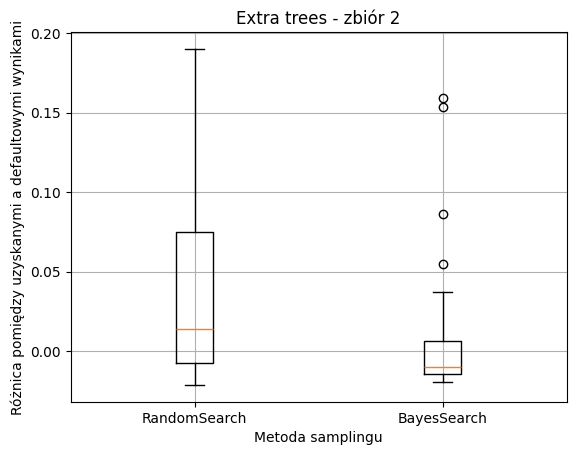

In [ ]:
data = [default_score_extra_2 - mean_test_scores_random_extra_2, default_score_extra_2 - mean_test_scores_bayes_extra_2]
labels = ['RandomSearch', 'BayesSearch']

plt.figure()
plt.boxplot(data, labels=labels)
plt.xlabel("Metoda samplingu")
plt.ylabel("Różnica pomiędzy uzyskanymi a defaultowymi wynikami")
plt.title("Extra trees - zbiór 2")
plt.grid(True)
plt.show()

In [ ]:
d_bayes_extra_3 = default_score_extra_3 - max(mean_test_scores_bayes_extra_3)
d_bayes_extra_3

-0.004444444444444473

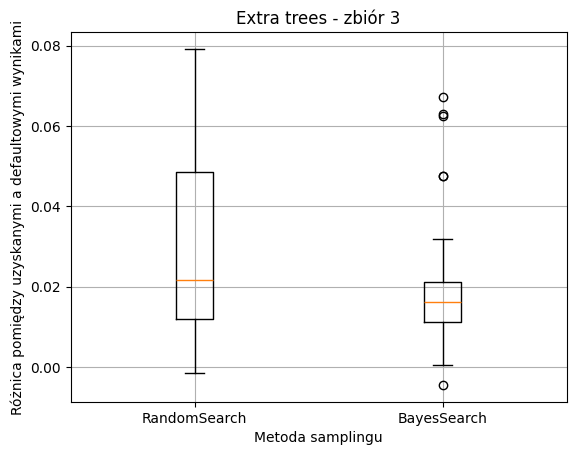

In [ ]:
data = [default_score_extra_3 - mean_test_scores_random_extra_3, default_score_extra_3 - mean_test_scores_bayes_extra_3]
labels = ['RandomSearch', 'BayesSearch']

plt.figure()
plt.boxplot(data, labels=labels)
plt.xlabel("Metoda samplingu")
plt.ylabel("Różnica pomiędzy uzyskanymi a defaultowymi wynikami")
plt.title("Extra trees - zbiór 3")
plt.grid(True)
plt.show()

In [ ]:
d_bayes_extra_4 = default_score_extra_4 - max(mean_test_scores_bayes_extra_4)
d_bayes_extra_4

-0.014999999999999791

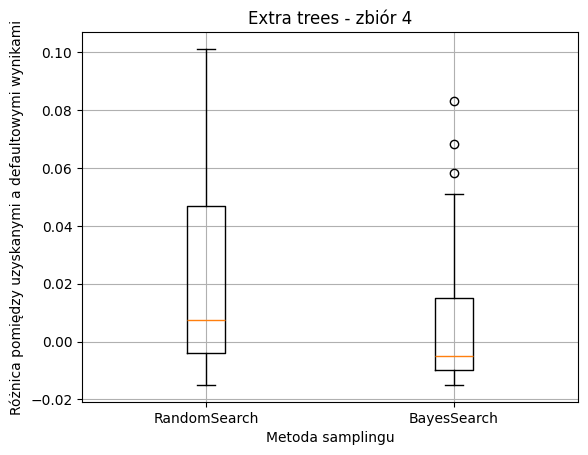

In [ ]:
data = [default_score_extra_4 - mean_test_scores_random_extra_4, default_score_extra_4 - mean_test_scores_bayes_extra_4]
labels = ['RandomSearch', 'BayesSearch']

plt.figure()
plt.boxplot(data, labels=labels)
plt.xlabel("Metoda samplingu")
plt.ylabel("Różnica pomiędzy uzyskanymi a defaultowymi wynikami")
plt.title("Extra trees - zbiór 4")
plt.grid(True)
plt.show()